# Module 3 Homework

## Processing Dr. Bergen's Eagle Data

Dr. Bergen, Director of the WSU Statistical Consulting Center, has a data processing task for you.  The associated data can be found in the `data` folder of this repository.  

Dr. Bergen had the following to say about the data.

 - One row = one GPS measurement.  
 - Subsample of 10K GPS points from a couple bald eagles in Iowa. 
 - **Context.** need to use the flight characteristics to perform $k$-means clustering of the flight points.  
 
Variables to be used for clustering include

- `KPH` (km per hour; an instantaneous measure of speed; measured by the GPS device);
- `Sn` (an average speed; given 2 time points and at locations and something like );
- `AGL0` (meters above ground level);
- `VerticalRate` (change in AGL between two time points; large negative if descending quickly; large positive if ascending quickly);
- `absVR` (absolute value of VerticalRate); and
- `abs_angle`c(absolute value of turn angle, in radians; larger values equal more “tortuous”, i.e. twisty flight)

All variables except for `VerticalRate` are skewed and all variables need to be mean-centered and standardized prior to clustering.

<img src="./img/summary_of_features.png"/>

Note that data is 

- *mean-centered* by subtracting the mean of the column from each entry.
- *standardized* by dividing each entry by the standard deviation of the column.

### Tasks

You need to use the techniques from this modules lectures to perform the following tasks.

- Apply `sqrt` transform to `KPH`, `Sn`, `AGL0`, `absVR` and `abs_angle`
- Mean-center and standardize transformed variables from above as well as `VerticalRate`
- Visualize the transformed features.  Use a [seaborn multi-plot grid](https://seaborn.pydata.org/tutorial/axis_grids.html) to plot all the variables on the same panel.  **HINT.** To make this work, you will need to stack all of the transformed features.

Because you are applying the same transformations multiple times, you will perform the task twice, once for each of the method covered in Activity 3.2: (A) `dict` unpacking and (B) Stack, transform, unstack.

In [1]:
import pandas as pd
pd.set_option("display.max_column", None)
from dfply import *
from math import sqrt
import seaborn as sns

#### Problem 1

First, complete the task using the `dict` unpacking techniques from Lecture 3.5.

In [2]:
eagles = pd.read_csv("./data/bald_eagle_subsample.csv")
eagles.head()

,Animal_ID,Sex,Age2,LocalTime,KPH,Sn,AGL0,VerticalRate,abs_angle,absVR
0,105,F,Fledgling,7/4/19 9:01,32.81,6.89,0.02,-0.002167,0.006277,0.002167
1,105,F,Fledgling,7/4/19 9:01,29.63,7.79,0.00,-0.120000,0.570000,0.120000
2,106,F,Fledgling,7/6/19 7:02,35.42,8.58,13.15,0.490000,2.010000,0.490000
3,106,F,Fledgling,7/6/19 7:02,32.87,9.13,10.88,-0.450000,1.100000,0.450000
4,106,F,Fledgling,7/6/19 7:02,35.37,10.01,7.28,-0.720000,0.370000,0.720000


In [3]:
# ugh, having VerticalRate in the middle of our other columns is going to be really annoying. Let's just move it
# yes, we could use select every time, but that's equally annoying
# The _ID column added by gather will insert to the left, so we'll move VerticalRate to the end
eagles = eagles[['Animal_ID', 'Sex', 'Age2', 'LocalTime', 'KPH', 'Sn', 'AGL0', 'abs_angle', 'absVR', 'VerticalRate']]

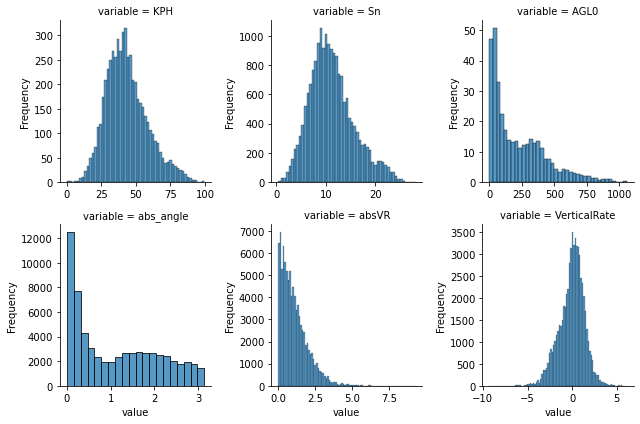

In [4]:
# What happens if we try reproducing the above set of grids?
# We don't see the intial spike in KPH or Sn
# Seems like there was a poor binning choice above for VR but it's probably a similar shape

(sns.FacetGrid((eagles >> gather("variable", "value", columns_from("KPH"))), 
               col="variable", col_wrap=3, sharex= False, sharey=False)
    .map(sns.histplot, "value", stat="frequency")
);

In [5]:
# Verify change was preserved
eagles.columns

Index(['Animal_ID', 'Sex', 'Age2', 'LocalTime', 'KPH', 'Sn', 'AGL0',
       'abs_angle', 'absVR', 'VerticalRate'],
      dtype='object')

In [6]:
all_var_cols = eagles.columns[-6:]
vars_except_vr = all_var_cols[:-1]
vars_except_vr

Index(['KPH', 'Sn', 'AGL0', 'abs_angle', 'absVR'], dtype='object')

In [7]:
# DON'T do this to VerticalRate - contains negative values
sqrt_dict = { f"{col}_sqrt" : X[col].map(sqrt) for col in vars_except_vr}
sqrt_dict

{'KPH_sqrt': <dfply.base.Intention at 0x7f37585e7c40>,
 'Sn_sqrt': <dfply.base.Intention at 0x7f37585e7eb0>,
 'AGL0_sqrt': <dfply.base.Intention at 0x7f375862c190>,
 'abs_angle_sqrt': <dfply.base.Intention at 0x7f375862c430>,
 'absVR_sqrt': <dfply.base.Intention at 0x7f375862c730>}

In [8]:
eagles_sqrt = (eagles
    >> mutate(**sqrt_dict)
)
eagles_sqrt.head()

,Animal_ID,Sex,Age2,LocalTime,KPH,Sn,AGL0,abs_angle,absVR,VerticalRate,KPH_sqrt,Sn_sqrt,AGL0_sqrt,abs_angle_sqrt,absVR_sqrt
0,105,F,Fledgling,7/4/19 9:01,32.81,6.89,0.02,0.006277,0.002167,-0.002167,5.728001,2.624881,0.141421,0.079229,0.046548
1,105,F,Fledgling,7/4/19 9:01,29.63,7.79,0.00,0.570000,0.120000,-0.120000,5.443345,2.791057,0.000000,0.754983,0.346410
2,106,F,Fledgling,7/6/19 7:02,35.42,8.58,13.15,2.010000,0.490000,0.490000,5.951470,2.929164,3.626293,1.417745,0.700000
3,106,F,Fledgling,7/6/19 7:02,32.87,9.13,10.88,1.100000,0.450000,-0.450000,5.733236,3.021589,3.298485,1.048809,0.670820
4,106,F,Fledgling,7/6/19 7:02,35.37,10.01,7.28,0.370000,0.720000,-0.720000,5.947268,3.163858,2.698148,0.608276,0.848528


In [9]:
# Square root is easy enough to eyeball check, but this next transform is harder, so let's do it the hard way to compare
(eagles_sqrt.KPH_sqrt.mean(), eagles_sqrt.KPH_sqrt.std())

(6.4979789794634195, 1.1454188670043175)

In [10]:
(eagles_sqrt.KPH_sqrt - 6.49797898)/1.14541887

0      -0.672224
1      -0.920741
2      -0.477126
3      -0.667653
4      -0.480794
          ...   
9995   -1.021244
9996   -0.571126
9997   -0.879222
9998    0.826906
9999    0.236009
Name: KPH_sqrt, Length: 10000, dtype: float64

In [11]:
@make_symbolic
def center_and_standardize(col):
    # Probably premature optimization, but this prevents it from calling mean and std for every element
    col_mean = col.mean()
    col_std = col.std()
    return (col - col_mean) / col_std

In [12]:
# Final answer:
eagles_finished1 = (eagles
    >> mutate(**{f"{col}" : X[col].map(sqrt) for col in vars_except_vr})
    >> mutate(**{ f"{col}" : center_and_standardize(X[col]) 
                     for col in all_var_cols}
             )
)
eagles_finished1.head()

,Animal_ID,Sex,Age2,LocalTime,KPH,Sn,AGL0,abs_angle,absVR,VerticalRate
0,105,F,Fledgling,7/4/19 9:01,-0.672224,-0.957445,-1.874878,-1.697594,-2.083444,0.024918
1,105,F,Fledgling,7/4/19 9:01,-0.920741,-0.712885,-1.895064,-0.356132,-1.394379,-0.057365
2,106,F,Fledgling,7/6/19 7:02,-0.477126,-0.509635,-1.377443,0.959536,-0.581851,0.368596
3,106,F,Fledgling,7/6/19 7:02,-0.667653,-0.373613,-1.424235,0.227150,-0.648904,-0.287802
4,106,F,Fledgling,7/6/19 7:02,-0.480794,-0.164236,-1.509927,-0.647365,-0.240543,-0.476343


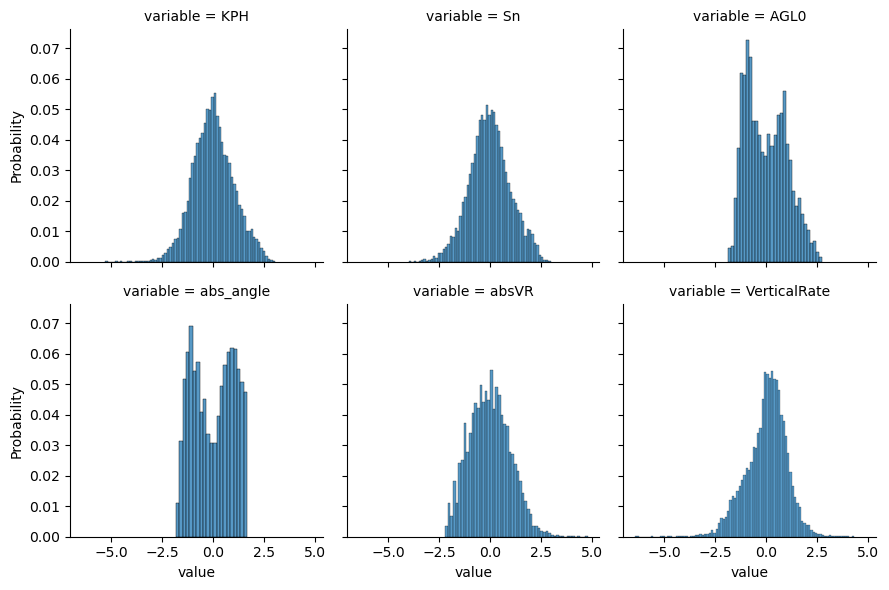

In [13]:
eag_stacked1 = eagles_finished1 >> gather("variable", "value", all_var_cols)

# I have no idea what kind of plot the sample graphs are.
# They are almost a probability or density plot
# but then we see |angle| with a value > 1 which is not possible in those kinds of plots
# In fact, the other plots look like there are both probability and density plots there, just based on y-axis
# Besides, you can't get the plots to match if you use the data from the file anyways - the shapes are a bit different
# Even with independent axes, it doesn't make any sense
# That said, the top 3 look like probability plots from the y-axis, so that's what I'll go with

(sns.FacetGrid(eag_stacked1, col="variable", col_wrap=3)
    .map(sns.histplot, "value", stat="probability")
);

#### Problem 2

Now redo the problem, this time using the $Stack\rightarrow Transform\rightarrow Unstack$ technique. 

In [14]:
(eagles
    >> gather("variable", "value", vars_except_vr, add_id=True) # or columns_between("KPH", "VerticalRate", inclusive=False)
    >> mutate(value = X.value.map(sqrt))
    >> spread("variable", "value")
)

,Animal_ID,Sex,Age2,LocalTime,VerticalRate,_ID,AGL0,KPH,Sn,absVR,abs_angle
0,105,F,Fledgling,7/4/19 9:01,-0.120000,1,0.000000,5.443345,2.791057,0.346410,0.754983
1,105,F,Fledgling,7/4/19 9:01,-0.002167,0,0.141421,5.728001,2.624881,0.046548,0.079229
2,106,F,Fledgling,7/10/19 5:34,-1.240000,42,4.989990,7.567034,3.784178,1.113553,0.768115
3,106,F,Fledgling,7/10/19 5:34,-0.870000,45,4.135215,6.581033,3.286335,0.932738,0.678233
4,106,F,Fledgling,7/10/19 5:34,-0.250000,44,4.727579,6.661081,3.498571,0.500000,1.315295
...,...,...,...,...,...,...,...,...,...,...,...
9995,106,F,Juvenile,8/17/19 17:13,0.620000,8691,22.976510,8.026830,4.117038,0.787401,0.932738
9996,106,F,Juvenile,8/17/19 17:13,0.630000,8692,23.058838,7.778175,4.090232,0.793725,0.316228
9997,106,F,Juvenile,8/17/19 17:13,0.810000,8696,23.007173,8.549269,4.739198,0.900000,0.300000
9998,106,F,Juvenile,8/17/19 17:13,1.190000,8694,23.025638,8.459905,4.373786,1.090871,0.538516


In [15]:
# original grouping method
(eagles
    >> gather("variable", "value", vars_except_vr, add_id=True)
    >> mutate(value = X.value.map(sqrt))
    >> spread("variable", "value")
    >> gather("variable2", "value2", all_var_cols, add_id=True)
    >> mutate(colmean = X.groupby("variable2")["value2"].transform("mean"),
              colstd = X.groupby("variable2")["value2"].transform("std"))
    >> mutate(zscore = (X.value2 - X.colmean) / X.colstd)
    >> drop(X.colmean, X.colstd, X.value2) # keeping them messes up the spread
    >> spread(X.variable2, X.zscore)
)

,Animal_ID,Sex,Age2,LocalTime,_ID,AGL0,KPH,Sn,VerticalRate,absVR,abs_angle
0,105,F,Fledgling,7/4/19 9:01,0,-1.895064,-0.920741,-0.712885,-0.057365,-1.394379,-0.356132
1,105,F,Fledgling,7/4/19 9:01,1,-1.874878,-0.672224,-0.957445,0.024918,-2.083444,-1.697594
2,106,F,Fledgling,7/10/19 5:34,2,-1.182787,0.933331,0.748684,-0.839457,0.368468,-0.330065
3,106,F,Fledgling,7/10/19 5:34,3,-1.304799,0.072510,0.016013,-0.581087,-0.047034,-0.508492
4,106,F,Fledgling,7/10/19 5:34,4,-1.220244,0.142395,0.328359,-0.148143,-1.041439,0.756159
...,...,...,...,...,...,...,...,...,...,...,...
9995,106,F,Juvenile,8/17/19 17:13,9995,1.384631,1.334753,1.238552,0.459375,-0.381010,-0.003266
9996,106,F,Juvenile,8/17/19 17:13,9996,1.396382,1.117666,1.199102,0.466358,-0.366476,-1.227120
9997,106,F,Juvenile,8/17/19 17:13,9997,1.389008,1.790865,2.154181,0.592051,-0.122264,-1.259334
9998,106,F,Juvenile,8/17/19 17:13,9998,1.391643,1.712846,1.616406,0.857404,0.316347,-0.785847


In [16]:
# Better grouping method
# Final answer
eagles_finished2 = (eagles
    >> gather("variable", "value", vars_except_vr, add_id=True)
    >> mutate(value = X.value.map(sqrt))
    >> spread("variable", "value")
    >> gather("variable2", "value2", all_var_cols, add_id=True)
    >> group_by(X.variable2)
    >> mutate(zscore = center_and_standardize(X.value2))
    >> drop(X.value2)
    >> spread(X.variable2, X.zscore)
    >> drop(X._ID)
)

# rows/columns are not in the same order as part 1, but the values are the same
eagles_finished2.head()

,Animal_ID,Sex,Age2,LocalTime,AGL0,KPH,Sn,VerticalRate,absVR,abs_angle
0,105,F,Fledgling,7/4/19 9:01,-1.895064,-0.920741,-0.712885,-0.057365,-1.394379,-0.356132
1,105,F,Fledgling,7/4/19 9:01,-1.874878,-0.672224,-0.957445,0.024918,-2.083444,-1.697594
2,106,F,Fledgling,7/10/19 5:34,-1.182787,0.933331,0.748684,-0.839457,0.368468,-0.330065
3,106,F,Fledgling,7/10/19 5:34,-1.304799,0.072510,0.016013,-0.581087,-0.047034,-0.508492
4,106,F,Fledgling,7/10/19 5:34,-1.220244,0.142395,0.328359,-0.148143,-1.041439,0.756159


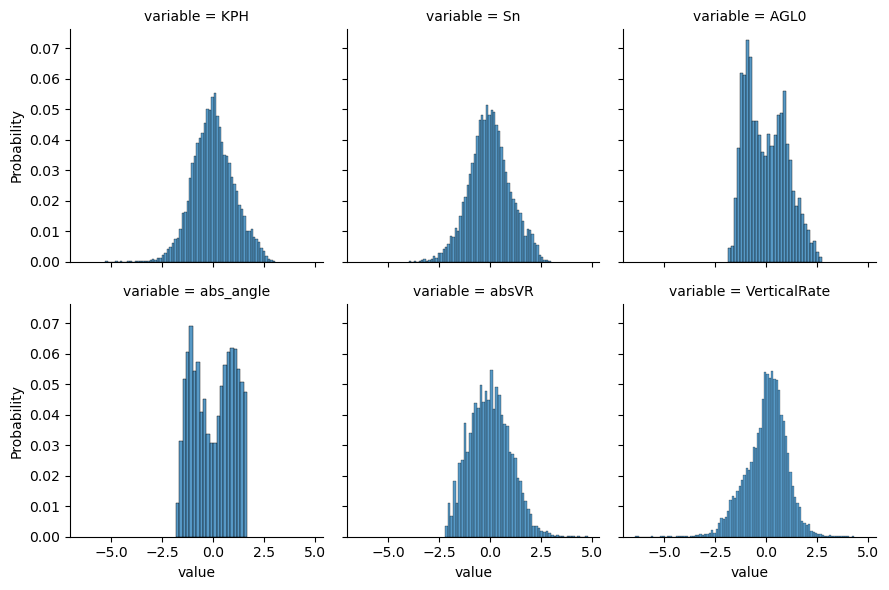

In [17]:
eag_stacked2 = eagles_finished2 >> gather("variable", "value", all_var_cols)

(sns.FacetGrid(eag_stacked2, col="variable", col_wrap=3)
    .map(sns.histplot, "value", stat="probability")
);

**Deliverables.** You should keep any code cells you used to test/figure-out the solution, but the end result should be two cells,

1. A cell containing all necessary import statements
2. A second cell containing all the code and data management in one pipe; along with all other objects used in the pipe.
3. A third cell containing all the code needed to create your visualization.

Note that these three cells should work independent of the rest of your code: If I restart the kernel and run only these cells, everything should work.

In [18]:
# Cell 1: imports
import pandas as pd
pd.set_option("display.max_column", None)
from dfply import *
from math import sqrt
import seaborn as sns

In [19]:
# Cell 2: utilities and data management
eagles = pd.read_csv("./data/bald_eagle_subsample.csv")
eagles = eagles[['Animal_ID', 'Sex', 'Age2', 'LocalTime', 'KPH', 'Sn', 'AGL0', 'abs_angle', 'absVR', 'VerticalRate']]

all_var_cols = eagles.columns[-6:]
vars_except_vr = all_var_cols[:-1]

@make_symbolic
def center_and_standardize(col):
    # Probably premature optimization, but this prevents it from calling mean and std for every element
    col_mean = col.mean()
    col_std = col.std()
    return (col - col_mean) / col_std

# I'm picking the task 1 version of data management because it's shorter
eagles_final = (eagles
                    >> mutate(**{ f"{col}" : X[col].map(sqrt) for col in vars_except_vr })
                    >> mutate(**{ f"{col}" : center_and_standardize(X[col]) 
                                     for col in all_var_cols }
                             )
                )
eagles_final.head()

,Animal_ID,Sex,Age2,LocalTime,KPH,Sn,AGL0,abs_angle,absVR,VerticalRate
0,105,F,Fledgling,7/4/19 9:01,-0.672224,-0.957445,-1.874878,-1.697594,-2.083444,0.024918
1,105,F,Fledgling,7/4/19 9:01,-0.920741,-0.712885,-1.895064,-0.356132,-1.394379,-0.057365
2,106,F,Fledgling,7/6/19 7:02,-0.477126,-0.509635,-1.377443,0.959536,-0.581851,0.368596
3,106,F,Fledgling,7/6/19 7:02,-0.667653,-0.373613,-1.424235,0.227150,-0.648904,-0.287802
4,106,F,Fledgling,7/6/19 7:02,-0.480794,-0.164236,-1.509927,-0.647365,-0.240543,-0.476343


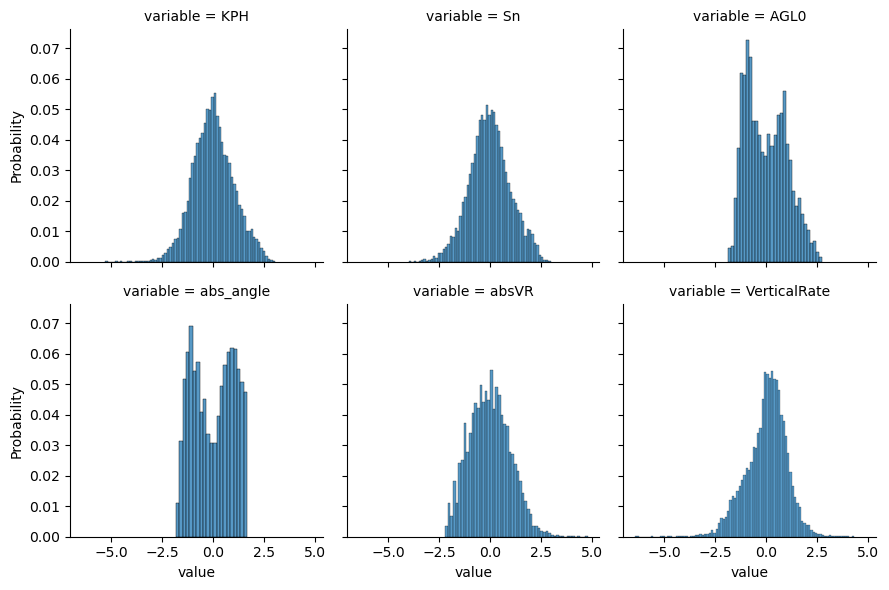

In [20]:
# Cell 3: 
stacked_eagles = (eagles_final >> gather("variable", "value", all_var_cols))

(sns.FacetGrid(stacked_eagles, col="variable", col_wrap=3)
    .map(sns.histplot, "value", stat="probability")
);